In [27]:
# Thanks to below links.

#https://towardsdatascience.com/what-are-the-commonly-used-statistical-tests-in-data-science-a95cfc2e6b5e
#https://www.stratascratch.com/blog/basic-types-of-statistical-tests-in-data-science/
#https://vitalflux.com/different-types-of-statistical-tests-concepts-examples/
#https://www.listendata.com/2015/05/population-stability-index.html

#https://towardsdatascience.com/psi-and-csi-top-2-model-monitoring-metrics-924a2540bed8
#https://www.statstest.com/cramers-v-2/
#https://www.listendata.com/2015/05/population-stability-index.html

#Model shifts
#https://www.analyticsvidhya.com/blog/2017/07/covariate-shift-the-hidden-problem-of-real-world-data-science/
#https://www.analyticsvidhya.com/blog/2021/10/mlops-and-the-importance-of-data-drift-detection/
#https://medium.com/bigdatarepublic/detecting-data-drift-with-machine-learning-adb177544312
#https://www.datacamp.com/tutorial/understanding-data-drift-model-drift
#https://www.kdnuggets.com/2022/07/detecting-data-drift-ensuring-production-ml-model-quality-eurybia.html
#https://towardsdatascience.com/checking-model-stability-and-population-shift-with-psi-and-csi-6d12af008783

In [1]:
import pandas as pd

In [2]:
#Load dataset
df_marketing_campaign = pd.read_csv('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/marketing_campaign.csv', sep= '\t')
df_marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_marketing_campaign.shape

(2240, 29)

In [4]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [5]:
#very in-frequent categories, removing for proper/stable chi-square statistics
df_marketing_campaign = df_marketing_campaign[~df_marketing_campaign.isin(['Alone', 'Absurd','YOLO'])]
df_marketing_campaign['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [6]:
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


df_marketing_campaign = df_marketing_campaign[cols]
df_marketing_campaign.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2235,1967,Graduation,Married,61223.0,0,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5
2236,1946,PhD,Together,64014.0,2,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7
2237,1981,Graduation,Divorced,56981.0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6
2238,1956,Master,Together,69245.0,0,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3
2239,1954,PhD,Married,52869.0,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7


In [7]:
#We will create two samples to perform 2-sample tests, which are helpful for data-drift detection
data_1 = df_marketing_campaign.sample(frac=0.5)

data_2 = df_marketing_campaign.sample(frac=0.5)

In [8]:
display(data_1.head())

print('\n\n')

display(data_2.head())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
724,1976,Graduation,Married,7500.0,1,01-08-2012,19,7,0,12,13,7,32,5,4,1,2,9
2080,1973,Graduation,Married,27803.0,1,26-08-2012,40,8,26,46,38,9,49,2,3,0,4,8
265,1966,Master,Married,38179.0,1,14-03-2013,30,38,4,22,4,2,20,4,3,1,3,7
726,1955,Graduation,Married,80395.0,0,23-11-2013,62,445,25,706,80,76,48,1,6,5,12,2
1222,1957,2n Cycle,Divorced,77297.0,0,26-01-2013,84,408,61,109,48,122,41,1,5,7,9,4


,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
610,1969,Master,Single,26877.0,0,19-08-2013,74,101,13,76,20,18,40,2,3,1,6,6
1501,1973,2n Cycle,Divorced,31163.0,1,13-02-2014,54,2,3,10,11,2,10,1,1,0,3,6
964,1980,Graduation,Married,50183.0,1,25-06-2014,47,97,12,84,13,10,15,7,3,1,6,5
665,1959,Graduation,Married,18690.0,0,28-12-2012,77,6,1,7,23,4,19,1,1,1,2,8
332,1956,PhD,Married,66334.0,0,03-04-2013,82,909,11,218,0,0,23,2,9,3,5,5


## Kolmogorov-Smirnov Test

### We will perform Kolmogorov-Smirnov (K-S) test for detecting whether the two samples are identical or not for numeric data

### The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.

### The null hypothesis (Ho) is that the two dataset values are from the same continuous distribution.
### The alternative hypothesis (Ha) is that these two datasets are from different continuous distributions.

In [12]:
'''
 `two-sided`: The null hypothesis is that the two distributions are
  identical, F(x)=G(x) for all x; the alternative is that they are not
  identical.
  
'''
from scipy import stats
import random

numeric_cols = ['Income',  'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#Significance level

p_value = 0.05
rejected = 0

for col in numeric_cols:
    test = stats.ks_2samp(data_1[col], data_2[col])

    print(col, test)
    if test[1] < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(numeric_cols)))

Income KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
Recency KstestResult(statistic=0.025, pvalue=0.8754126208113381)
MntWines KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntFruits KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntMeatProducts KstestResult(statistic=0.02142857142857143, pvalue=0.9593615947915428)
MntFishProducts KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
MntSweetProducts KstestResult(statistic=0.020535714285714286, pvalue=0.9723293165727622)
MntGoldProds KstestResult(statistic=0.026785714285714284, pvalue=0.8167638092508208)
NumDealsPurchases KstestResult(statistic=0.015178571428571428, pvalue=0.999515760916742)
NumWebPurchases KstestResult(statistic=0.014285714285714285, pvalue=0.9998505708532414)
NumCatalogPurchases KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
NumStorePurchases KstestResult(statistic=0.016964285714285713, pvalue=0.997

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10120\4271623305.py:21: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  test = stats.ks_2samp(data_1[col], data_2[col])


In [13]:
#Let's assume the income of people increased by 10-20% in future.
data_2_future = data_2.copy()
pct_low = .1
pct_high = .2
data_2_future['Income'] = data_2_future['Income'].apply(lambda v : v * (1 + random.uniform(pct_low,pct_high)))
data_2.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1120.000000,1104.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1968.904464,53330.689312,0.439286,49.174107,314.151786,28.067857,175.664286,38.749107,27.976786,43.972321,2.342857,4.086607,2.695536,5.933036,5.225000
std,11.915504,28069.605072,0.537986,29.192974,341.137639,42.263407,233.220833,56.044143,42.178833,51.099302,2.023177,2.681582,2.927051,3.268172,2.430683
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,36072.500000,0.000000,24.000000,25.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,53128.500000,0.000000,50.000000,194.000000,8.000000,69.000000,12.000000,9.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1978.000000,69222.500000,1.000000,74.000000,508.250000,35.000000,252.250000,52.000000,36.000000,58.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [14]:
data_2_future.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1120.000000,1104.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1968.904464,61317.842628,0.439286,49.174107,314.151786,28.067857,175.664286,38.749107,27.976786,43.972321,2.342857,4.086607,2.695536,5.933036,5.225000
std,11.915504,32002.103998,0.537986,29.192974,341.137639,42.263407,233.220833,56.044143,42.178833,51.099302,2.023177,2.681582,2.927051,3.268172,2.430683
min,1899.000000,1923.075948,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,41330.799160,0.000000,24.000000,25.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,60924.149447,0.000000,50.000000,194.000000,8.000000,69.000000,12.000000,9.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1978.000000,79085.448833,1.000000,74.000000,508.250000,35.000000,252.250000,52.000000,36.000000,58.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,753068.302408,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [15]:
'''
 `two-sided`: The null hypothesis is that the two distributions are
  identical, F(x)=G(x) for all x; the alternative is that they are not
  identical.
  
'''
from scipy import stats
import random

numeric_cols = ['Income',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#Significance level

p_value = 0.05
rejected = 0

for col in numeric_cols:
    test = stats.ks_2samp(data_1[col], data_2_future[col])

    print(col, test)
    if test[1] < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(numeric_cols)))

Income KstestResult(statistic=0.16160714285714287, pvalue=3.526887911398711e-13)
Column rejected Income
Recency KstestResult(statistic=0.025, pvalue=0.8754126208113381)
MntWines KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntFruits KstestResult(statistic=0.025892857142857145, pvalue=0.8472105468520287)
MntMeatProducts KstestResult(statistic=0.02142857142857143, pvalue=0.9593615947915428)
MntFishProducts KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
MntSweetProducts KstestResult(statistic=0.020535714285714286, pvalue=0.9723293165727622)
MntGoldProds KstestResult(statistic=0.026785714285714284, pvalue=0.8167638092508208)
NumDealsPurchases KstestResult(statistic=0.015178571428571428, pvalue=0.999515760916742)
NumWebPurchases KstestResult(statistic=0.014285714285714285, pvalue=0.9998505708532414)
NumCatalogPurchases KstestResult(statistic=0.016964285714285713, pvalue=0.9970680991992215)
NumStorePurchases KstestResult(statistic=0.0169642

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10120\3583942376.py:21: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  test = stats.ks_2samp(data_1[col], data_2_future[col])


In [16]:
#There is a detected data-drift in Income column now.
#pvalue < acceptance threshold (0.05)

## Population Stability Index

### Population Stability Index: PSI is a symmetric version of KL Divergence. It's used a lot in financial domain and below are some widely accepted threshold for it. It's used for detecting the data-drift in numerical columns.

### a) When PSI<=0.1  ,This means there is no change or shift in the distributions of both datasets.

### b) 0.1< PSI<0.2  ,This indicates a slight change or shift has occurred.

### c) PSI>0.2   ,This indicates a large shift in the distribution has occurred between both datasets.


### It is a metric to measure how much a variable has shifted in distribution between two samples over time. It is widely used for monitoring changes in the characteristics of a population and for diagnosing possible problems in model performance — many a times, it’s a good indication if the model has stopped predicting accurately due to significant changes in the population distribution.

### PSI tends to overall population shift whereas CSI tends to focus on the individual model variables used.

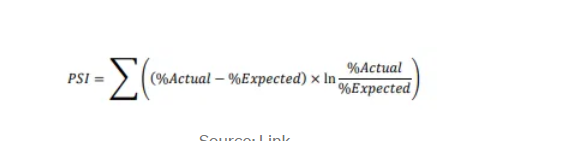

In [28]:
from IPython import display
display.Image("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/ss1.PNG")

In [17]:
import numpy as np

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [18]:
for col in numeric_cols:
    val = calculate_psi(data_1[col], data_2[col])
    if val <  0.1:
        print(col, val, "No significant drift/shift detected")
    elif val > 0.1 and val < 0.2:
        print(col, val, "Slight drift/shift detected")
    else:
        print(col, val, "Significant drift/shift detected")

Income 0.01788452795587243 No significant drift/shift detected
Recency 0.004917477903419154 No significant drift/shift detected
MntWines 0.009926126187326046 No significant drift/shift detected
MntFruits 0.010641433193628373 No significant drift/shift detected
MntMeatProducts 0.004254959947161567 No significant drift/shift detected
MntFishProducts 0.013525016577104452 No significant drift/shift detected
MntSweetProducts 0.006076836790752769 No significant drift/shift detected
MntGoldProds 0.006671097298096873 No significant drift/shift detected
NumDealsPurchases 0.006958768862318567 No significant drift/shift detected
NumWebPurchases 0.0028676932052252584 No significant drift/shift detected
NumCatalogPurchases 0.002571742508656527 No significant drift/shift detected
NumStorePurchases 0.006649973256352848 No significant drift/shift detected
NumWebVisitsMonth 0.005281569583618077 No significant drift/shift detected


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10120\3378259138.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


In [19]:
for col in numeric_cols:
    val = calculate_psi(data_1[col], data_2_future[col])
    if val <  0.1:
        print(col, val, "No significant drift/shift detected")
    elif val > 0.1 and val < 0.2:
        print(col, val, "Slight drift/shift detected")
    else:
        print(col, val, "Significant drift/shift detected")

Income 0.2535583290685702 Significant drift/shift detected
Recency 0.004917477903419154 No significant drift/shift detected
MntWines 0.009926126187326046 No significant drift/shift detected
MntFruits 0.010641433193628373 No significant drift/shift detected
MntMeatProducts 0.004254959947161567 No significant drift/shift detected
MntFishProducts 0.013525016577104452 No significant drift/shift detected
MntSweetProducts 0.006076836790752769 No significant drift/shift detected
MntGoldProds 0.006671097298096873 No significant drift/shift detected
NumDealsPurchases 0.006958768862318567 No significant drift/shift detected
NumWebPurchases 0.0028676932052252584 No significant drift/shift detected
NumCatalogPurchases 0.002571742508656527 No significant drift/shift detected
NumStorePurchases 0.006649973256352848 No significant drift/shift detected
NumWebVisitsMonth 0.005281569583618077 No significant drift/shift detected


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10120\3378259138.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


## Chi-square test for homogeneity

### Test for detecting whether the two samples are identical or not for categorical data

### Chi-square test works well with even two samples with difference sizes but should have same number of categories

In [20]:
from scipy.stats import chi2_contingency

def drift_chisquare(sample1, sample2):
    return chi2_contingency([sample1, sample2])[1]

In [21]:
#Let's look at categorcial variables
categorical_cols = ['Education', 'Marital_Status',]

for col in categorical_cols:
    print(col, set(df_marketing_campaign[col].values))

Education {'Graduation', 'Master', 'Basic', '2n Cycle', 'PhD'}
Marital_Status {nan, 'Married', 'Single', 'Widow', 'Together', 'Divorced'}


In [22]:
for col in categorical_cols:
    val = drift_chisquare(data_1[col].value_counts(),data_2[col].value_counts() )
    
    print(col,val)
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_cols)))

Education 0.9349453700002737
Marital_Status 0.6373321013669859
We rejected  0  columns in total out of 2 columns


In [24]:
#Let's assume married population increased by 15% in future.
def future_marital_status(v):
    if v == "Married":
        return v
    else:
        coin_toss = random.uniform(0,1)
        if coin_toss > 0.15:
            return v
        return 'Married'
    
data_2_future['Marital_Status'] = data_2_future['Marital_Status'].apply(lambda v : future_marital_status(v))
data_2['Marital_Status'].value_counts(), data_2_future['Marital_Status'].value_counts()

(Married     440
 Together    282
 Single      238
 Divorced    117
 Widow        40
 Name: Marital_Status, dtype: int64,
 Married     618
 Together    207
 Single      177
 Divorced     85
 Widow        31
 Name: Marital_Status, dtype: int64)

In [25]:
for col in categorical_cols:
    val = drift_chisquare(data_1[col].value_counts(),data_2_future[col].value_counts() )
    print(col,val)
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_cols)))

Education 0.9349453700002737
Marital_Status 1.5707091054833681e-12
Column rejected Marital_Status
We rejected  1  columns in total out of 2 columns


In [26]:
drift_chisquare([1,1,1],[1000,1000,1000])

1.0

## Characteristic stability index (CSI)

### It answers which variable is causing a shift in population distribution. It compares the distribution of an independent variable in the scoring data set to a development data set. It detects shifts in the distributions of input variables that are submitted for scoring over time.

### It helps to determine which changing variable is responsible majorly for causing the model score shift.

### The Characteristic Stability Index (CSI) is used to evaluate the stability or drift of each feature so that we can find the problematic one. As PSI is concerned with the effects of the population drift on the model's predictions, the CSI is concerned with understanding how the feature distributions have changed.

In [32]:
def psi(score_initial, score_new, num_bins = 10, mode = 'fixed'):
    
    eps = 1e-4
    
    # Sort the data
    score_initial.sort()
    score_new.sort()
    
    # Prepare the bins
    min_val = min(min(score_initial), min(score_new))
    max_val = max(max(score_initial), max(score_new))
    if mode == 'fixed':
        bins = [min_val + (max_val - min_val)*(i)/num_bins for i in range(num_bins+1)]
    elif mode == 'quantile':
        bins = pd.qcut(score_initial, q = num_bins, retbins = True)[1] # Create the quantiles based on the initial population
    else:
        raise ValueError(f"Mode \'{mode}\' not recognized. Your options are \'fixed\' and \'quantile\'")
    bins[0] = min_val - eps # Correct the lower boundary
    bins[-1] = max_val + eps # Correct the higher boundary
        
        
    # Bucketize the initial population and count the sample inside each bucket
    bins_initial = pd.cut(score_initial, bins = bins, labels = range(1,num_bins+1))
    df_initial = pd.DataFrame({'initial': score_initial, 'bin': bins_initial})
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / sum(grp_initial['initial'])
    
    # Bucketize the new population and count the sample inside each bucket
    bins_new = pd.cut(score_new, bins = bins, labels = range(1,num_bins+1))
    df_new = pd.DataFrame({'new': score_new, 'bin': bins_new})
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])
    
    # Compare the bins to calculate PSI
    psi_df = grp_initial.join(grp_new, on = "bin", how = "inner")
    
    # Add a small value for when the percent is zero
    psi_df['percent_initial'] = psi_df['percent_initial'].apply(lambda x: eps if x == 0 else x)
    psi_df['percent_new'] = psi_df['percent_new'].apply(lambda x: eps if x == 0 else x)
    
    # Calculate the psi
    psi_df['psi'] = (psi_df['percent_initial'] - psi_df['percent_new']) * np.log(psi_df['percent_initial'] / psi_df['percent_new'])
    
    # Return the psi values
    return psi_df['psi'].values

In [61]:
data_1_num = data_1[['Income',  'Recency',
       'MntGoldProds']]

data_2_num = data_2[['Income',  'Recency',
       'MntGoldProds']]

In [62]:
data_1_num.head()

,Income,Recency,MntGoldProds
724,7500.0,19,32
2080,27803.0,40,49
265,38179.0,30,20
726,80395.0,62,48
1222,77297.0,84,41


In [63]:
# Fixed
print("CSI - Fixed-size bins")
for col in data_1_num.columns:
    csi_values = psi(data_1_num[col].values, data_2_num[col].values, mode = 'fixed')
    csi = np.mean(csi_values)
    print(f'{col} -> {csi=:.4f}')


CSI - Fixed-size bins
Income -> csi=0.0003
Recency -> csi=0.0005
MntGoldProds -> csi=0.0010


In [64]:
# Quantile
print("\\nCSI - Quantile bins")
for col in data_1_num.columns:
    csi_values = psi(data_1_num[col].values, data_2_num[col].values, mode = 'quantile')
    csi = np.mean(csi_values)
    print(f'{col} -> {csi=:.4f}')

\nCSI - Quantile bins
Income -> csi=0.0006
Recency -> csi=0.0004
MntGoldProds -> csi=0.0013
